In [1]:
from scipy.signal import savgol_filter

In [2]:

import get_db_data as gdd
import analyze_signal as anaz
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(gdd);
reload(anaz);
from sqlalchemy.engine.result import RowProxy
from numpy.linalg import norm
import seaborn as sns
from scipy.stats import zscore

In [3]:
gdd.group_signal_sql

In [4]:
data = gdd.get_db_data()
pars = data.get_participants(True)

In [5]:
cohes ={a[1]: str(a[2])[:4] for a in pars}

In [6]:
pars

[(1001, 101, Decimal('4.25000')),
 (1001, 102, Decimal('5.00000')),
 (1001, 103, Decimal('5.25000')),
 (1003, 108, Decimal('4.00000')),
 (1003, 109, Decimal('1.50000')),
 (1004, 110, Decimal('3.50000')),
 (1004, 111, Decimal('2.75000')),
 (1004, 112, Decimal('3.75000')),
 (1006, 116, Decimal('4.00000')),
 (1006, 117, Decimal('4.75000')),
 (1006, 118, Decimal('3.25000')),
 (1007, 119, Decimal('3.25000')),
 (1007, 120, Decimal('5.00000')),
 (1007, 121, Decimal('4.75000')),
 (1008, 122, Decimal('6.00000')),
 (1008, 123, Decimal('6.00000')),
 (1008, 124, Decimal('4.75000')),
 (1009, 125, Decimal('5.50000')),
 (1009, 126, Decimal('5.00000')),
 (1009, 127, Decimal('4.00000')),
 (1010, 128, Decimal('4.75000')),
 (1010, 129, Decimal('3.75000')),
 (1010, 130, Decimal('3.25000')),
 (1011, 131, Decimal('5.00000')),
 (1011, 132, Decimal('4.25000')),
 (1011, 133, Decimal('6.00000')),
 (1012, 134, Decimal('1.00000')),
 (1012, 135, Decimal('2.00000')),
 (1012, 136, Decimal('4.25000')),
 (1013, 137, D

In [7]:
pars_tuples={}
for g, p, _ in pars:
    pars_tuples[g] = pars_tuples.get(g,[])  + [p]
pars_tuples

{1001: [101, 102, 103],
 1003: [108, 109],
 1004: [110, 111, 112],
 1006: [116, 117, 118],
 1007: [119, 120, 121],
 1008: [122, 123, 124],
 1009: [125, 126, 127],
 1010: [128, 129, 130],
 1011: [131, 132, 133],
 1012: [134, 135, 136],
 1013: [137, 138, 139],
 1014: [140, 141, 142],
 1015: [144, 145],
 1016: [146, 147, 148],
 1017: [149, 151],
 1019: [155, 156, 157],
 1020: [158, 159, 160],
 1022: [164, 165, 166],
 1023: [167, 168, 169],
 1024: [170, 171, 172],
 1025: [173, 174, 175],
 1026: [176, 177, 178],
 1027: [179, 180, 181],
 1028: [182, 183],
 1029: [185, 186, 187],
 1030: [188, 189, 190],
 1031: [191, 192, 193],
 1032: [194, 195, 196],
 1033: [200, 201, 202],
 1034: [203, 204, 205],
 1035: [206, 207, 208],
 1036: [209, 210, 211],
 1037: [212, 213, 214],
 1038: [215, 216, 217],
 1039: [218, 219, 220],
 1040: [221, 222, 223],
 1041: [224, 225, 226],
 1042: [227, 228, 229],
 1043: [230, 231, 232],
 1044: [233, 234, 235],
 1045: [236, 237, 238],
 1046: [239, 240, 241],
 1047: [242,

In [8]:
def plot_interaction(par_list,ax, cohesions, z=True):
    par_ids = [];
    for j, (par_id, par_data) in enumerate(data.get_signal_by_series_type_and_interp_type(par_list,1,3)):
        par_ids.append(str(par_id))
        y = zscore(par_data[:,1]) +j*3 if z else par_data[:,1]
        ax.plot(par_data[:,0], y)
        i = int(np.random.rand()*200)
        #ax.text(par_data[i,0],y[i],str(cohesions.get(par_id,"NA")))
    ax.legend(par_ids)


In [9]:
k=4; s=0
ptk = list(pars_tuples.keys())


In [10]:
def yield_group_signals(group_id,series_type):
    return data.get_signal_by_series_type_and_interp_type(pars_tuples[group_id],series_type,3)


### Group 1009

In [33]:
x1,x2,x3 = list(yield_group_signals(1009,2))

In [34]:
y1, y2, y3 = [zscore(x[1][:,1]) for x in [x1,x2,x3] ]

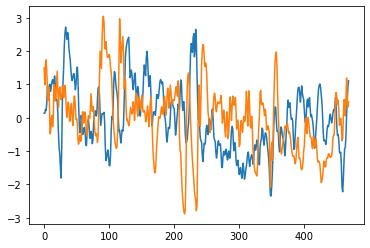

In [35]:
plt.plot(y1)
plt.plot(y2)

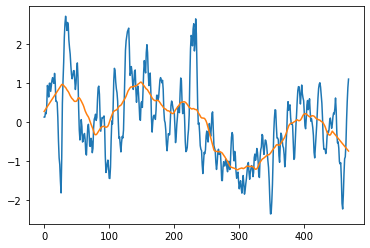

In [58]:
s1 = savgol_filter(y1,51,1)
plt.plot(y1)
plt.plot(s1)

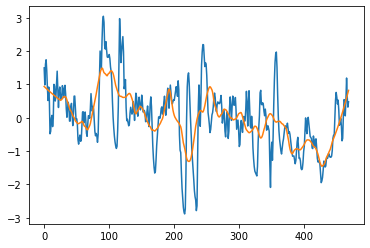

In [60]:
s2 = savgol_filter(y2,51,2)
plt.plot(y2)
plt.plot(s2)

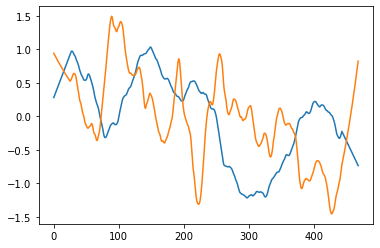

In [64]:
plt.plot(s1)
plt.plot(s2)

In [65]:
np.var(s1),np.var(s2)

(0.4034321542652069, 0.431779811739649)

In [66]:
np.corrcoef(y1,y2)

array([[ 1.        , -0.09506609],
       [-0.09506609,  1.        ]])

In [67]:
np.corrcoef(s1,s2)

array([[1.       , 0.1241852],
       [0.1241852, 1.       ]])

In [68]:
np.corrcoef(y1-s1,y2-s2)

array([[ 1.        , -0.20908391],
       [-0.20908391,  1.        ]])

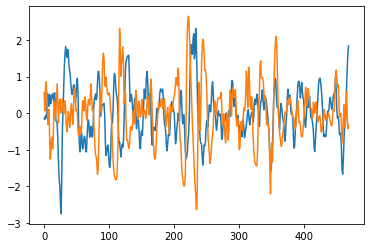

In [69]:
plt.plot(y1-s1)
plt.plot(y2-s2)

### Group 1010

In [102]:
x1,x2,x3 = list(yield_group_signals(1010,2))

In [103]:
y1, y2, y3 = [zscore(x[1][:,1]) for x in [x1,x2,x3] ]

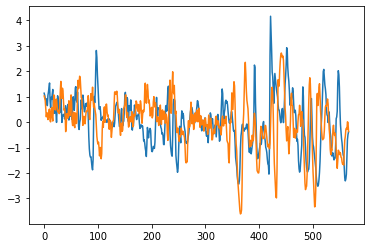

In [104]:
plt.plot(y1)
plt.plot(y2)

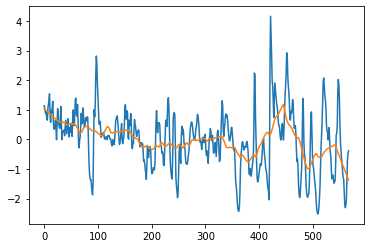

In [105]:
s1 = savgol_filter(y1,51,1)
plt.plot(y1)
plt.plot(s1)

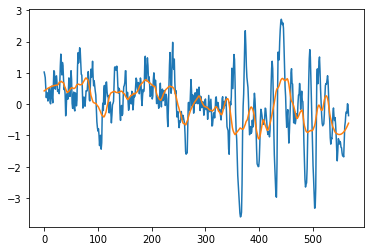

In [106]:
s2 = savgol_filter(y2,51,2)
plt.plot(y2)
plt.plot(s2)

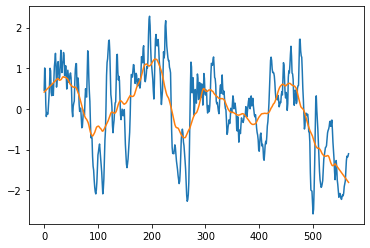

In [107]:
s3 = savgol_filter(y3,51,1)
plt.plot(y3)
plt.plot(s3)

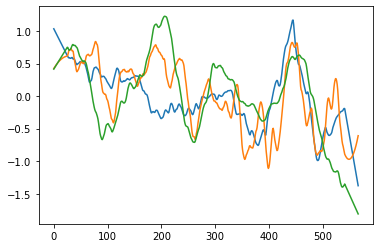

In [108]:
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

In [109]:
np.var(s1),np.var(s2)

(0.21899320890709942, 0.2843506381082633)

In [110]:
np.corrcoef(np.vstack([y1,y2,y3]))

array([[1.        , 0.19107908, 0.19840203],
       [0.19107908, 1.        , 0.34662399],
       [0.19840203, 0.34662399, 1.        ]])

In [111]:
np.corrcoef(np.vstack([s1,s2,s3]))

array([[1.        , 0.63833386, 0.52109723],
       [0.63833386, 1.        , 0.63346432],
       [0.52109723, 0.63346432, 1.        ]])

In [112]:
r1 = savgol_filter((y1-s1)**2,21,1)
r2 = savgol_filter((y2-s2)**2,21,1)
r3 = savgol_filter((y3-s3)**2,21,1)
np.corrcoef(np.vstack([r1,r2,r3]))

array([[ 1.        ,  0.34301332,  0.18637895],
       [ 0.34301332,  1.        , -0.08285314],
       [ 0.18637895, -0.08285314,  1.        ]])

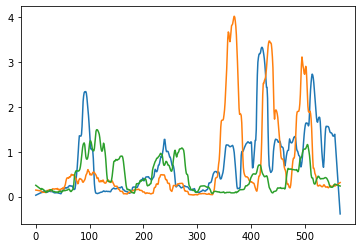

In [113]:
plt.plot(r1)
plt.plot(r2)
plt.plot(r3)


### Group 1011

In [114]:
x1,x2,x3 = list(yield_group_signals(1011,2))

In [115]:
y1, y2, y3 = [zscore(x[1][:,1]) for x in [x1,x2,x3] ]

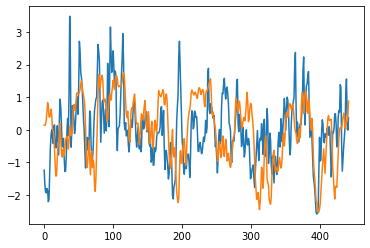

In [116]:
plt.plot(y1)
plt.plot(y2);

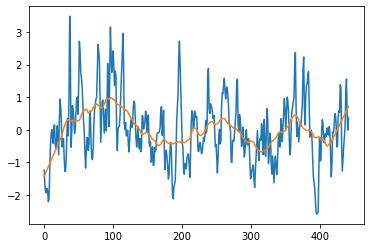

In [117]:
s1 = savgol_filter(y1,51,1)
plt.plot(y1)
plt.plot(s1);

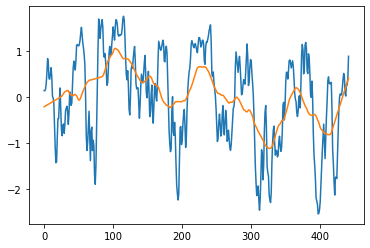

In [118]:
s2 = savgol_filter(y2,51,1)
plt.plot(y2)
plt.plot(s2)

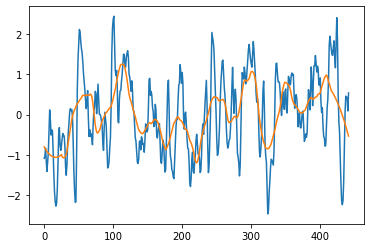

In [119]:
s3 = savgol_filter(y3,51,2)
plt.plot(y3)
plt.plot(s3)

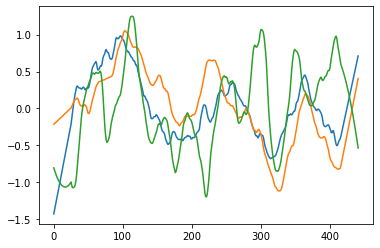

In [120]:
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

In [122]:
np.var(s1),np.var(s2), np.var(s3)

(0.20951639464564406, 0.23632982383876194, 0.3436575289709959)

In [123]:
np.corrcoef(np.vstack([y1,y2,y3]))

array([[1.        , 0.36085564, 0.1501412 ],
       [0.36085564, 1.        , 0.0174882 ],
       [0.1501412 , 0.0174882 , 1.        ]])

In [124]:
np.corrcoef(np.vstack([s1,s2,s3]))

array([[1.        , 0.65593058, 0.36844029],
       [0.65593058, 1.        , 0.02325367],
       [0.36844029, 0.02325367, 1.        ]])

In [142]:
r1 = savgol_filter((y1-s1)**2,21,1,mode="mirror")
r2 = savgol_filter((y2-s2)**2,21,1,mode="mirror")
r3 = savgol_filter((y3-s3)**2,21,1,mode="mirror")
r_mat = np.sqrt(np.vstack([r1,r2,r3]))
np.corrcoef(r_mat)

array([[1.        , 0.49095303, 0.23681283],
       [0.49095303, 1.        , 0.097658  ],
       [0.23681283, 0.097658  , 1.        ]])

In [148]:
import pandas as pd
sr = pd.DataFrame({
    "s1": s1,
    "s2": s2,
    "s3": s3,
    "r1": np.sqrt(r1),
    "r2": np.sqrt(r2),
    "r3": np.sqrt(r3),
    
})

In [149]:
sr.corr()

,s1,s2,s3,r1,r2,r3
s1,1.000000,0.655931,0.368440,0.298380,-0.163391,0.210354
s2,0.655931,1.000000,0.023254,0.039587,-0.383742,-0.134276
s3,0.368440,0.023254,1.000000,0.201547,0.201313,0.148581
r1,0.298380,0.039587,0.201547,1.000000,0.490953,0.236813
r2,-0.163391,-0.383742,0.201313,0.490953,1.000000,0.097658
r3,0.210354,-0.134276,0.148581,0.236813,0.097658,1.000000


In [143]:
np.corrcoef((np.vstack([s1,s2,s3,r_mat])))

array([[ 1.        ,  0.65593058,  0.36844029,  0.2983796 , -0.16339091,
         0.21035394],
       [ 0.65593058,  1.        ,  0.02325367,  0.03958712, -0.38374154,
        -0.13427616],
       [ 0.36844029,  0.02325367,  1.        ,  0.20154664,  0.2013132 ,
         0.14858055],
       [ 0.2983796 ,  0.03958712,  0.20154664,  1.        ,  0.49095303,
         0.23681283],
       [-0.16339091, -0.38374154,  0.2013132 ,  0.49095303,  1.        ,
         0.097658  ],
       [ 0.21035394, -0.13427616,  0.14858055,  0.23681283,  0.097658  ,
         1.        ]])

0

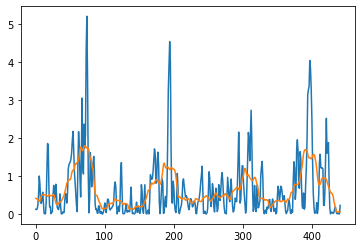

In [138]:
plt.plot((y2-s2)**2)
t = savgol_filter((y2-s2)**2,21,1,mode="mirror")
plt.plot(t)

np.sum(t<0)


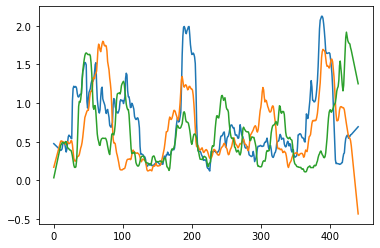

In [126]:
plt.plot(r1)
plt.plot(r2)
plt.plot(r3)


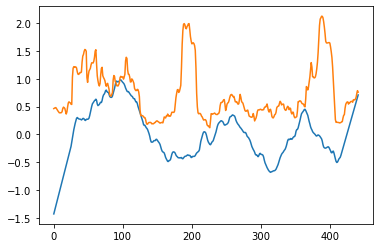

In [150]:
plt.plot(s1)
plt.plot(r1)

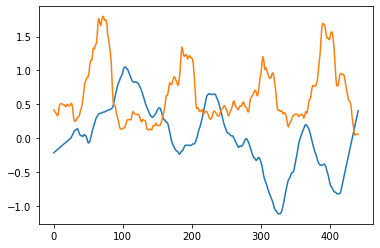

In [151]:
plt.plot(s2)
plt.plot(r2)

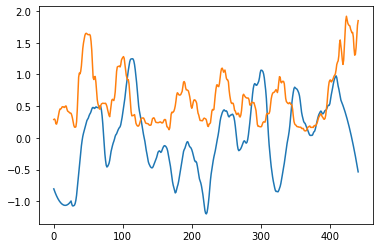

In [152]:
plt.plot(s3)
plt.plot(r3)